# Kinematics of waterbomb folding and derived characteristics

In [1]:
%matplotlib widget

In [2]:
from bmcs_shell.folding.wb_cell_5p import WBElem5Param, WBElemSymb5ParamXL

In [3]:
import numpy as np

In [4]:
data = dict(gamma=0.7, x_ur=1000, a=1000, b=1800, c=1000, show_wireframe=True)

In [5]:
wb = WBElem5Param(**data)

In [6]:
wb.interact()

## Waterbomb - 5 param folding

In [10]:
import sympy as sp
sp.init_printing()
import numpy as np

## Upper right corner node

Control parameters $a, b, c$ and angle $\alpha$

In [11]:
a, b, c = sp.symbols('a, b, c', positive=True)
alpha = sp.symbols('alpha', positive=True)

Position variables to be determined for the above control parameters

In [12]:
x_ur, y_ur, z_ur = sp.symbols(r'x^{\urcorner}, y^{\urcorner}, z^{\urcorner}', positive=True)

Node $V^\dashv$ rotates in the $xz$ plane. The control angle $\alpha = \pi/2$ for a flat state, i.e. $z^\dashv(\alpha=\pi/2) = 0$
\begin{align}
 V^\dashv = [c \sin(\alpha), 0, c \cos(\alpha)]
\end{align}

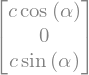

In [69]:
V_r_1 = sp.Matrix([c * sp.cos(alpha), 0, c * sp.sin(alpha)])
V_r_1

Positions of $U^\urcorner_0$ and $V^\dashv_0$ 

In [70]:
U_ur_0 = sp.Matrix([a, b, 0])
V_r_0 = sp.Matrix([c, 0, 0])

Express the lengths $|OU^{\urcorner}|$ and $|U^{\urcorner}V^\dashv|$ in initial state

In [71]:
UV_r_0 = V_r_0 - U_ur_0
L2_U_ur_0 = (U_ur_0.T * U_ur_0)[0]
L2_UV_r_0 = (UV_r_0.T * UV_r_0)[0]

And in a general state of folding

In [72]:
U_ur_1 = sp.Matrix([x_ur, y_ur, z_ur])
UV_r_1 = U_ur_1 - V_r_1
L2_U_ur_1 = (U_ur_1.T * U_ur_1)[0]
L2_UV_r_1 = (UV_r_1.T * UV_r_1)[0]

Use the two quadratic equations to find $y^{\urcorner}$ and $z^\urcorner$ 

In [73]:
Eq_L2_U_ur = sp.simplify(sp.Eq(L2_U_ur_1-L2_U_ur_0,0))
y_ur_sol = sp.solve(Eq_L2_U_ur, y_ur)[0]
Eq_L2_UV_r = sp.simplify(sp.Eq(L2_UV_r_1-L2_UV_r_0,0))
Eq_L2_UV_r_z_ur = Eq_L2_UV_r.subs(y_ur, y_ur_sol)
z_ur_sol = sp.solve(Eq_L2_UV_r_z_ur, z_ur)[0]
U_ur = sp.Matrix([x_ur, y_ur_sol.subs(z_ur, z_ur_sol), z_ur_sol])

The resulting position of $U^\urcorner$ reads

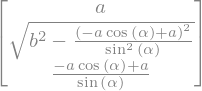

In [74]:
U_ur.subs(x_ur,a)

Check the obtained coordinates for $\lim_{\alpha \rightarrow 0} U^\urcorner$ for $x^\urcorner = a$

In [75]:
[sp.limit( U_ur.subs(x_ur,a)[idx], alpha, 0) for idx in [0,1,2]]

In a symmetric case, the other corner points can be simply mirrored 
with respect to the symmetry planes $xz$ and $xy$.

## Compatible rotation of a cell around $x$ axis

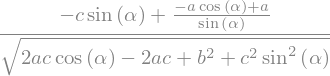

In [76]:
U_ur_a = U_ur.subs(x_ur,a)
V_UV = sp.trigsimp(U_ur_a - V_r_1)
L_UV = sp.sqrt(V_UV[1] ** 2 + V_UV[2] ** 2)
sp.trigsimp(V_UV[2] / L_UV)

In [77]:
sp.limit(V_UV[2] / L_UV, alpha, 0)

In [78]:
theta_sol = sp.simplify(2 * sp.asin( V_UV[2] / L_UV))

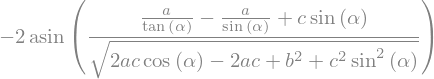

In [79]:
sp.trigsimp(theta_sol)

In [80]:
sp.limit(theta_sol, alpha, 0 )

\begin{align}
\sin(\theta) &= \frac{a - c \cos^2(\alpha) - a \sin(\alpha)}
{ 2\cos(\alpha) \sqrt{2ac \sin(\alpha) - 2ac + b^2 + c^2 \cos^2(\alpha)  } }
\end{align}

## Rotation of  a shifted cell

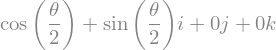

In [81]:
from sympy.algebras.quaternion import Quaternion
theta = sp.Symbol(r'theta')
q_theta = Quaternion.from_axis_angle([1, 0, 0], theta)
q_theta

In [82]:
d_1, d_2, d_3 = sp.symbols('d_1, d_2, d_3')
D_a = sp.Matrix([d_1, d_2, d_3])

In [83]:
UD_ur_a = U_ur_a + D_a
VD_r_a = V_r_1 + D_a

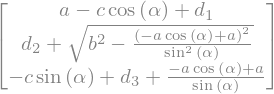

In [84]:
UD_ur_a - V_r_1

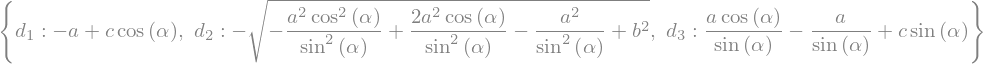

In [85]:
d_subs = sp.solve(UD_ur_a - V_r_1, [d_1, d_2, d_3])
d_subs

## Rotate by $\theta$

Define the center of rotation

In [86]:
UD_ur_a_ = UD_ur_a.subs(d_subs)

Rotated point

In [87]:
WD_r_a_ = VD_r_a.subs(d_subs)

Pull back the point so that the center of rotation is at origin

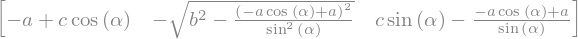

In [88]:
WD_r_a_pb = WD_r_a_ - UD_ur_a_
WD_r_a_pb.T

Rotate the point around the quaternion

In [89]:
WD_r_a_rot = q_theta.rotate_point(WD_r_a_pb.T, q_theta)

Push forward to the center of rotation

In [90]:
WD_r_a_pf = sp.Matrix(WD_r_a_rot) + UD_ur_a_
WD_r_a_theta = WD_r_a_pf.subs(theta, -theta_sol)

Rotate also the midpoint

In [91]:
DD_a_pb = D_a.subs(d_subs) - UD_ur_a_
DD_a_rot = q_theta.rotate_point(DD_a_pb.T, q_theta)
DD_a_pf = sp.simplify(sp.Matrix(DD_a_rot) + UD_ur_a_)
DD_a_theta = DD_a_pf.subs(theta, -theta_sol)

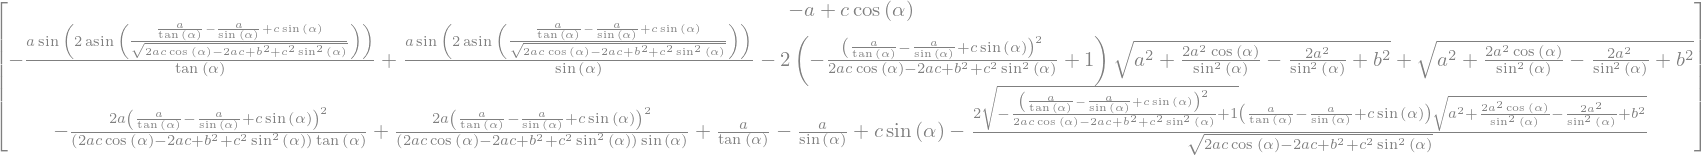

In [92]:
DD_a_theta

In [96]:
get_U_ur_a = sp.lambdify((alpha, a, b, c), U_ur_a )
get_WD_r_a_theta = sp.lambdify((alpha, a, b, c), WD_r_a_theta)

In [97]:
get_U_ur_a(0.2, 3, 10, 1)

array([[3.        ],
       [9.9954688 ],
       [0.30100402]])

In [98]:
get_WD_r_a_theta(0.2, 3, 10, 1)

array([[-1.03986684],
       [-9.9954688 ],
       [ 0.30100402]])

In [99]:
sp.simplify((WD_r_a_theta - U_ur_a)[0])

## Cross sectional height

In [68]:
H = W_p_a[2]
H

NameError: name 'W_r_a' is not defined

In [32]:
V_WD = (WD_p_a_theta - DD_a_theta)
Vzy_WD = sp.Matrix([V_WD[1], V_WD[2]])

In [33]:
L_WD = Vzy_WD.T * Vzy_WD

In [34]:
get_L_WD = sp.lambdify((alpha, a, b, c), L_WD, 'numpy')

In [35]:
np.sqrt(get_L_WD(np.pi/2,2,3,5))

array([[5.]])

## Symmetry axis of the cylinder

In [39]:
D0_a = sp.Matrix([0,0,0])

In [40]:
W_m_a[2]

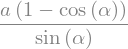

In [41]:
U_mm_a[2]

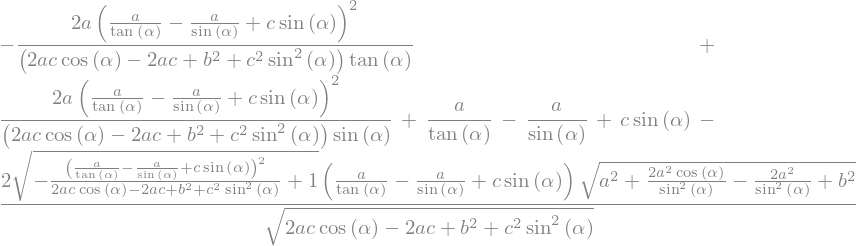

In [42]:
DD_a_theta[2]

Find the point at which the line connection between
\begin{align}
 U_{mm} + \rho (U_{mm} - D)
\end{align}
intersects the vertical axis

In [43]:
rho = (U_mm_a[2] - DD_a_theta[2]) / (U_mm_a[1] - DD_a_theta[1]) * U_mm_a[1]
R_0 = U_mm_a[2] - rho

In [44]:
get_U_mm_a = sp.lambdify((alpha, a, b, c), U_mm_a, 'numpy')
get_DD_a_theta = sp.lambdify((alpha, a, b, c), DD_a_theta, 'numpy')
get_rho = sp.lambdify((alpha, a, b, c), rho, 'numpy')
get_R_0 = sp.lambdify((alpha, a, b, c), R_0, 'numpy')

In [45]:
data = dict(alpha=1, a=1, b=1, c=1)
get_U_mm_a(**data)

array([[-1.        ],
       [-0.83758796],
       [ 0.54630249]])

In [46]:
get_DD_a_theta(**data)

array([[-1.54030231],
       [-0.31003043],
       [-0.10925565]])

In [47]:
get_rho(**data)

In [48]:
get_R_0(**data)

In [49]:
phi_0 = sp.asin( DD_a_theta[1] / R_0 )

In [50]:
get_phi_0 = sp.lambdify((alpha, a, b, c), phi_0, 'numpy')

In [51]:
get_phi_0(**data)